# Study Region Selection and Visualization

This Jupyter Notebook initiates the data processing and analysis workflow by focusing on the selection and initial visualization of the study region for this hydrological modeling project. **The study is centered within the state of New York**. Given the project's scope and the need for sufficient data density (aimed at about 150 - 250 stream gauge sations), the selection process will involve identifying a suitable [Hydrologic Unit Code (HUC) level 2 (HU2) watershed](https://nas.er.usgs.gov/hucs.aspx). The primary criteria for selecting the target HU2 watershed will be its overall size and, critically, the density and distribution of stream and precipitation gauge stations, ensuring adequate data availability for model calibration and evaluation while keeping the number of data points limited. This notebook will provide an initial overview of the chosen study region, including the spatial distribution and number of key hydrological infrastructure elements such as precipitation gauge stations, stream gauge stations, and dams. Furthermore, it will visualize the relevant state and county boundaries that encompass the selected study area, providing essential geographic context for the subsequent data extraction and analysis steps.

In [92]:
# Import packages
import geopandas as gpd
from shapely.geometry import Point
from pathlib import Path
from plotnine import *
import pandas as pd
import json
import warnings
from IPython.display import display, Markdown
import os
import matplotlib.pyplot as plt
import sys

# Supress warnings
warnings.filterwarnings("ignore")

In [96]:
# Import created functions
project_root = Path.cwd().parent.parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))
from src.utils.data_utils import glimpse

In [65]:
# File paths
project_base_path = Path.cwd().parent.parent
shapefiles_base_path = project_base_path / 'data' / 'bronze' / 'geo' / 'shp'
us_county_path = shapefiles_base_path / 'us_county' / 'tl_2024_us_county.shp'
us_state_path = shapefiles_base_path / 'us_state' / 'tl_2024_us_state.shp'

WB_01_HU2_U2_path = shapefiles_base_path / 'WBD_01_HU2_Shape' / 'Shape' / 'WBDHU2.shp'
WB_02_HU2_U2_path = shapefiles_base_path / 'WBD_02_HU2_Shape' / 'Shape' / 'WBDHU2.shp'
WB_04_HU2_U2_path = shapefiles_base_path / 'WBD_04_HU2_Shape' / 'Shape' / 'WBDHU2.shp'
WB_05_HU2_U2_path = shapefiles_base_path / 'WBD_05_HU2_Shape' / 'Shape' / 'WBDHU2.shp'

In [66]:
# Load style configuration for maps
map_style_path = project_base_path / 'config' / 'map_style.json'
with open(map_style_path, 'r') as f:
    map_style = json.load(f).get('map_styles',[])

In [67]:
# Load files
us_state = gpd.read_file(us_state_path)
us_county = gpd.read_file(us_county_path)

# Check CRS
if us_state.crs != us_county.crs:
    print('The CRS differs from each other. Converting CRS')
    us_county = us_county.to_crs(us_state.crs)
else:
    print(f'Both files are in the same CRS: {us_state.crs.name} ')


Both files are in the same CRS: NAD83 


In [68]:
us_state.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,GEOIDFQ,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,0400000US54,WV,West Virginia,00,G4000,A,62266513826,488918898,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,0400000US12,FL,Florida,00,G4000,A,138965379385,45968913048,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,0400000US17,IL,Illinois,00,G4000,A,143778206717,6216848695,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,0400000US27,MN,Minnesota,00,G4000,A,206244791203,18937236061,+46.3159573,-094.1996043,"POLYGON ((-95.31991 48.99892, -95.31778 48.998..."
4,3,5,24,01714934,24,0400000US24,MD,Maryland,00,G4000,A,25151223822,6979843236,+38.9466584,-076.6744939,"POLYGON ((-75.756 39.24607, -75.75578 39.24334..."


## HU2 Watershed level that intersects with the state of NY

Text(0.5, 1.0, 'New York State')

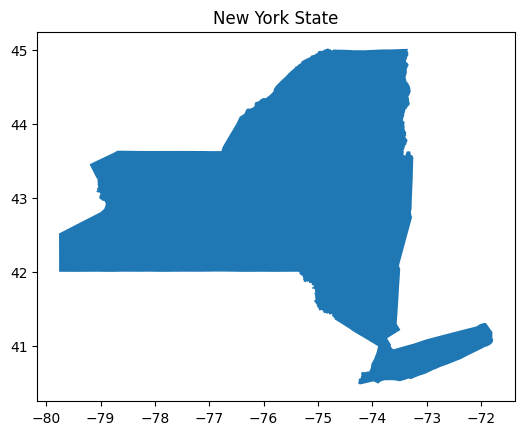

In [69]:
# Filter state of New York
ny_state_boundary = us_state[us_state['NAME']=='New York']
ny_state_boundary.plot().set_title("New York State")

In [70]:
# Load Watershed Boundaries
WB_01_HU2_U2 = gpd.read_file(WB_01_HU2_U2_path)
WB_02_HU2_U2 = gpd.read_file(WB_02_HU2_U2_path)
WB_04_HU2_U2 = gpd.read_file(WB_04_HU2_U2_path)
WB_05_HU2_U2 = gpd.read_file(WB_05_HU2_U2_path)

if not (WB_01_HU2_U2.crs == WB_02_HU2_U2.crs == WB_04_HU2_U2.crs == WB_05_HU2_U2.crs == us_state.crs):
    display(Markdown('One or more files are not in the same CRS as us_state. Changing CRS must be performed before continuing.'))
else:
    print(f'All shapefiles are in the same CRS: {us_state.crs.name}')

All shapefiles are in the same CRS: NAD83


In [71]:
wb_hu2 = pd.concat([WB_01_HU2_U2, WB_02_HU2_U2, WB_04_HU2_U2, WB_05_HU2_U2])
wb_hu2.head()

,tnmid,metasource,sourcedata,sourceorig,sourcefeat,loaddate,referenceg,areaacres,areasqkm,states,huc2,name,shape_Leng,shape_Area,ObjectID,geometry
0,{87290825-BAC9-4D07-8A32-E35A873C0BD1},{DB7D825F-8982-4ADD-B0F5-D2CA69DDA880},3D Elevation Product 1/3 Arc-second 1 x 1 degr...,U.S. Geological Survey,None,2021-05-18,None,4.913168e+07,198829.02,"CN,CT,MA,ME,NH,NY,RI,VT",01,New England Region,NaN,NaN,1,"MULTIPOLYGON (((-73.02573 41.21304, -73.02548 ..."
0,{4AEF9DDF-A9C6-400E-8FD8-180FD5C29F69},{23FC16E5-372F-475A-A0B1-4459BD8F69F4},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,None,2021-05-17,None,6.832031e+07,276482.71,"CT,DC,DE,MA,MD,NJ,NY,PA,RI,VA,VT,WV",02,Mid Atlantic Region,NaN,NaN,1,"MULTIPOLYGON (((-73.02556 41.21327, -73.02548 ..."
0,{EBD12DC7-3886-4A92-BF58-E3147628761B},{07F2976C-3180-40DD-A779-8A7E21DF268B},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,None,2024-12-24,None,2.081930e+08,842528.00,"CN,IL,IN,ME,MI,MN,NH,NY,OH,PA,VT,WI",04,Great Lakes Region,NaN,NaN,1,"POLYGON ((-89.13481 51.12818, -89.09873 51.108..."
0,{5C6AE09C-4CFC-4EBA-9344-A91AF35E73E8},{77406B88-053A-4214-A171-C18FBEB10EFD},None,U.S. Geological Survey,None,2022-02-18,None,1.042701e+08,421966.31,"IL,IN,KY,MD,NC,NY,OH,PA,TN,VA,WV",05,Ohio Region,NaN,NaN,1,"POLYGON ((-79.03733 42.44863, -79.03682 42.448..."


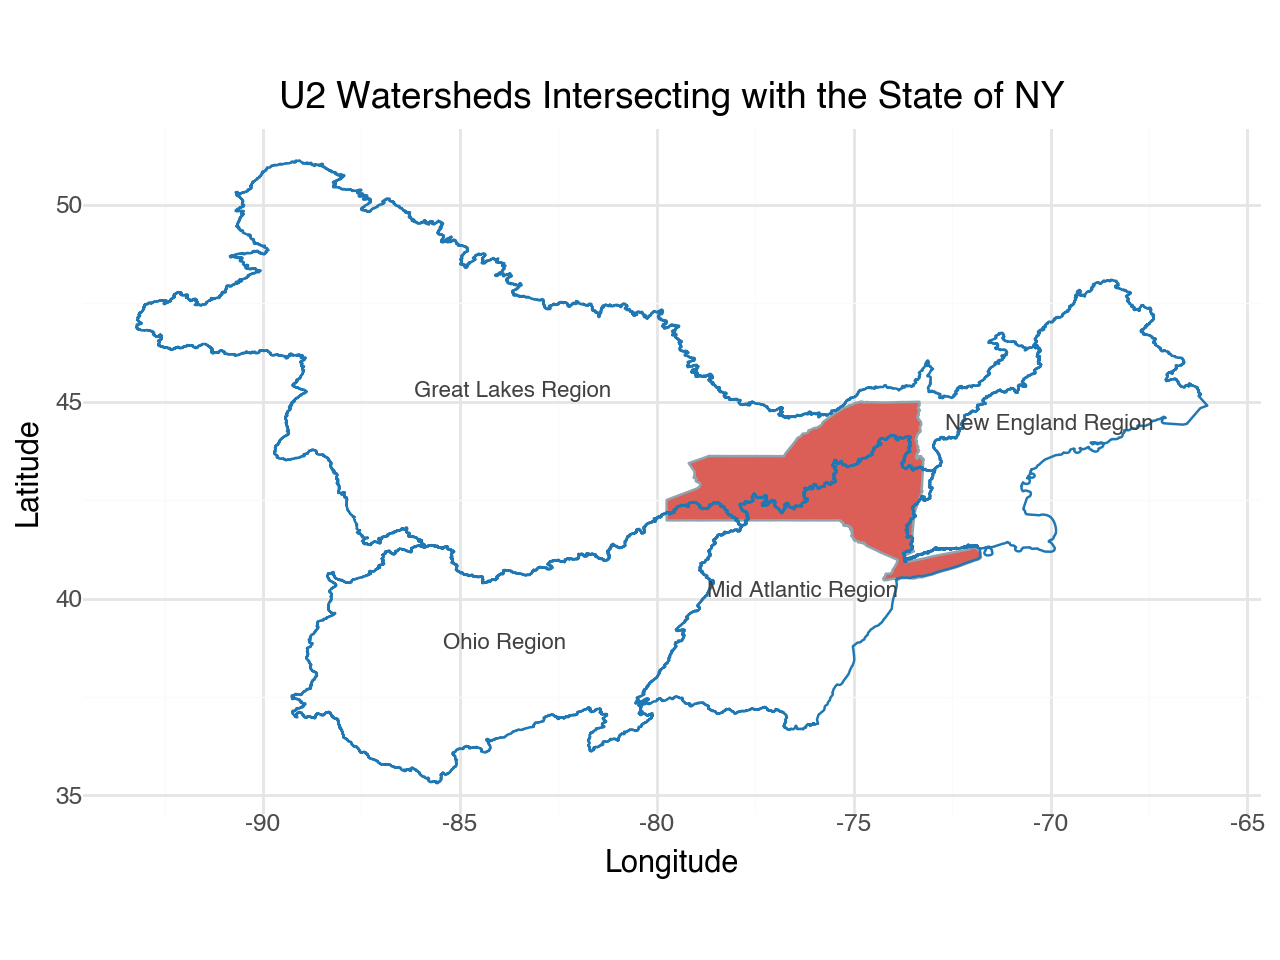

In [72]:
# Map style
wsb_style = map_style.get('watershed_boundary')

# Map
wsb_map = (
    ggplot()
    + geom_map(
        data=ny_state_boundary,
        mapping=aes(fill="NAME", geometry="geometry"),
        inherit_aes=False,
        color = map_style.get('us_states').get('color')
    )

    + geom_map(
        mapping=aes(geometry="geometry"),
        data=wb_hu2,
        inherit_aes=False,
        color=wsb_style.get('color'),
        fill=None,
    )
    + geom_text(
        mapping=aes(x=wb_hu2.centroid.x, y=wb_hu2.centroid.y, label=wb_hu2['name']),
        data=wb_hu2,
        inherit_aes=False,
        size=8,
        color=map_style.get('text').get('color')
    )
    + coord_fixed()
    + theme_minimal()
    + theme(legend_position="none", panel_grid_major=None, panel_grid_minor=None)
    + labs(title="U2 Watersheds Intersecting with the State of NY", x="Longitude", y="Latitude")
)
wsb_map.show()

## Number of Stream and precipitation gauging stations and number of dams for each U2 watershed level

In [73]:
#Load Stream Gauging Stations location
stream_gauge_stations_path = shapefiles_base_path / 'streamgage_stations' / 'realstx.shp'
stream_gauge_stations = gpd.read_file(stream_gauge_stations_path)

print(f'Stream Gauging Station CRS: {stream_gauge_stations.crs.name}')

Stream Gauging Station CRS: WGS 84


In [74]:
# Convert Precipitation and stream gauging station CRS to NAD83
stream_gauge_stations = stream_gauge_stations.to_crs(us_state.crs)

print(f'Stream Gauging Station CRS: {stream_gauge_stations.crs.name}')


Stream Gauging Station CRS: NAD83


In [75]:
precipitation_station_path = project_base_path / 'data/bronze/geo/json/ppt_stations_inventory.json'
with open(precipitation_station_path) as file:
    precipitation_station = json.load(file)
(pd.DataFrame(precipitation_station).head())

,StnID,Lat,Lon,Elev,State/Province,Name,WMO_ID,Sample_Interval (min),UTC_Offset,POR_Date_Range,PCT_POR_Good,Last_Half_POR,PCT_Last_Half_Good,Last_Qtr_POR,PCT_Last_Qtr_Good
0,USC00010008,31.5702,-85.2482,139.0,AL,ABBEVILLE,NaN,15,-6,19760901-20180418,74.4%,19970625-20180418,66.3%,20071121-20180418,62.0%
1,USC00010063,34.2110,-87.1784,239.6,AL,ADDISON,NaN,15,-6,19761001-20241211,79.4%,20001105-20241211,72.8%,20121123-20241211,86.1%
2,USC00010140,32.2322,-87.4104,53.3,AL,ALBERTA,NaN,15,-6,19710501-20241202,93.4%,19980215-20241202,91.8%,20110710-20241202,89.4%
3,USC00010252,31.3071,-86.5226,76.2,AL,ANDALUSIA 3 W,NaN,15,-6,19800301-20180205,89.1%,19990217-20180205,92.3%,20080812-20180205,97.4%
4,USC00010369,33.2941,-85.7788,311.5,AL,ASHLAND 3 ENE,NaN,15,-6,19720907-20130804,80.2%,19930219-20130804,73.7%,20030513-20130804,63.8%


The precipitation data documentation does not mention what is the Coordinate Reference System of the data [https://www1.ncdc.noaa.gov/pub/data/hpd/auto/v2/beta/15min/readme.15min.txt](https://www1.ncdc.noaa.gov/pub/data/hpd/auto/v2/beta/15min/readme.15min.txt). It was not also possible to get an answer from NOAA suport regarding the data CRS. The tupical practives in national data spanning the entire USA, is to use WGS 84, **therefore, for this study it was considered to be WGS84 (EPSG:4326).** 

The CRS used for this preprocessing is NAD83, the same used for the US states Tiger Data. Thefore, to keep consistency, the CRS of precipitation data is also converted to NAD83.

In [76]:
# Convert precipitation data into a geopandas object
precipitation_station_df = pd.DataFrame(precipitation_station)
precipitation_station_geo = gpd.GeoDataFrame(
    precipitation_station_df,
    geometry=[Point(xy) for xy in zip(precipitation_station_df.Lon, precipitation_station_df.Lat)],
    crs = 'EPSG:4326'
    )
precipitation_station_geo = precipitation_station_geo.to_crs(us_state.crs)
print(f'Precipitation Gauging Station CRS: {precipitation_station_geo.crs.name}')

Precipitation Gauging Station CRS: NAD83


In [88]:
# Dams
dams_location_path =  shapefiles_base_path / 'dams_location/Dams.gpkg'
dams_location = gpd.read_file(dams_location_path)
print(f"Dams' Location CRS: {dams_location.crs.name}")

Dams' Location CRS: NAD83


In [77]:
print('Stream Gauging Stations Attributes Preview:')
stream_gauge_stations.head()

Stream Gauging Stations Attributes Preview:


,STAID,STANAME,ST,HUC,CLASS,FLOW,STAGE,TIME,TIME_UTC,URL,DATUM,COUNT,PERCENTILE,FLOODSTAGE,geometry
0,01010000,"St. John River at Ninemile Bridge, Maine",me,01010001,0,0.0,5.68,2025-02-02 12:00:00,2025-02-02,https://waterdata.usgs.gov/monitoring-location...,NAD83,73,98.65,15.0,POINT (-69.71556 46.70056)
1,01010070,"Big Black River near Depot Mtn, Maine",me,01010001,0,0.0,4.13,2025-02-02 12:00:00,2025-02-02,https://waterdata.usgs.gov/monitoring-location...,NAD83,40,84.19,13.5,POINT (-69.75167 46.89389)
2,01010500,"St. John River at Dickey, Maine",me,01010001,0,0.0,6.74,2025-02-02 12:45:00,2025-02-02,https://waterdata.usgs.gov/monitoring-location...,NAD83,77,98.47,25.0,POINT (-69.08806 47.11305)
3,01011000,"Allagash River near Allagash, Maine",me,01010002,0,0.0,6.71,2025-02-02 12:00:00,2025-02-02,https://waterdata.usgs.gov/monitoring-location...,NAD83,92,98.92,15.0,POINT (-69.07945 47.06972)
4,01013500,"Fish River near Fort Kent, Maine",me,01010003,0,0.0,4.45,2025-02-02 12:45:00,2025-02-02,https://waterdata.usgs.gov/monitoring-location...,NAD83,94,93.61,11.0,POINT (-68.58278 47.2375)


In [78]:
print('Precipitation Gauging Station Attributes Preview:')
precipitation_station_geo.head()

Precipitation Gauging Station Attributes Preview:


,StnID,Lat,Lon,Elev,State/Province,Name,WMO_ID,Sample_Interval (min),UTC_Offset,POR_Date_Range,PCT_POR_Good,Last_Half_POR,PCT_Last_Half_Good,Last_Qtr_POR,PCT_Last_Qtr_Good,geometry
0,USC00010008,31.5702,-85.2482,139.0,AL,ABBEVILLE,NaN,15,-6,19760901-20180418,74.4%,19970625-20180418,66.3%,20071121-20180418,62.0%,POINT (-85.2482 31.5702)
1,USC00010063,34.2110,-87.1784,239.6,AL,ADDISON,NaN,15,-6,19761001-20241211,79.4%,20001105-20241211,72.8%,20121123-20241211,86.1%,POINT (-87.1784 34.211)
2,USC00010140,32.2322,-87.4104,53.3,AL,ALBERTA,NaN,15,-6,19710501-20241202,93.4%,19980215-20241202,91.8%,20110710-20241202,89.4%,POINT (-87.4104 32.2322)
3,USC00010252,31.3071,-86.5226,76.2,AL,ANDALUSIA 3 W,NaN,15,-6,19800301-20180205,89.1%,19990217-20180205,92.3%,20080812-20180205,97.4%,POINT (-86.5226 31.3071)
4,USC00010369,33.2941,-85.7788,311.5,AL,ASHLAND 3 ENE,NaN,15,-6,19720907-20130804,80.2%,19930219-20130804,73.7%,20030513-20130804,63.8%,POINT (-85.7788 33.2941)


In [97]:
print('Dams Location Attributes Preview:')
glimpse(dams_location)

Dams Location Attributes Preview:
Rows: 92192
Columns: 96
                              Null Count  Dtype           First Values
                              ----------  -----           -------------
name                          4327        object          [Aichi Forge Usa Dam, Oxy Usa Retention Pond, Dod Usa 4, Dod Usa 2, Girl Scouts of Usa Dam]
otherNames                    65682       object          [Aichi Forge Usa Lake, None, None, None, Lake Sparta Dam]
formerNames                   82022       object          [None, None, Dod Usa, Dod Usa, None]
nidId                         1           object          [KY00728, ND01160, OK20998, OK20994, NC02637]
otherStructureId              91272       object          [None, None, None, None, None]
federalId                     0           object          [KY00728, ND01160, OK20998, OK20994, NC02637]
ownerNames                    7144        object          [AICHI, OXY USA Inc., DEPT. OF DEFENSE/US ARMY RESERVE CENTER, DEPT. OF DEFENSE/US 

In [98]:
# Clip Gauging Stations and dams to the area of interest
clipped_stream_stations = gpd.clip(stream_gauge_stations, mask = wb_hu2)
clipped_ppt_stations = gpd.clip(precipitation_station_geo, mask=wb_hu2)
clipped_dams = dams_location[dams_location['huc2'].isin(wb_hu2['huc2'].unique())]


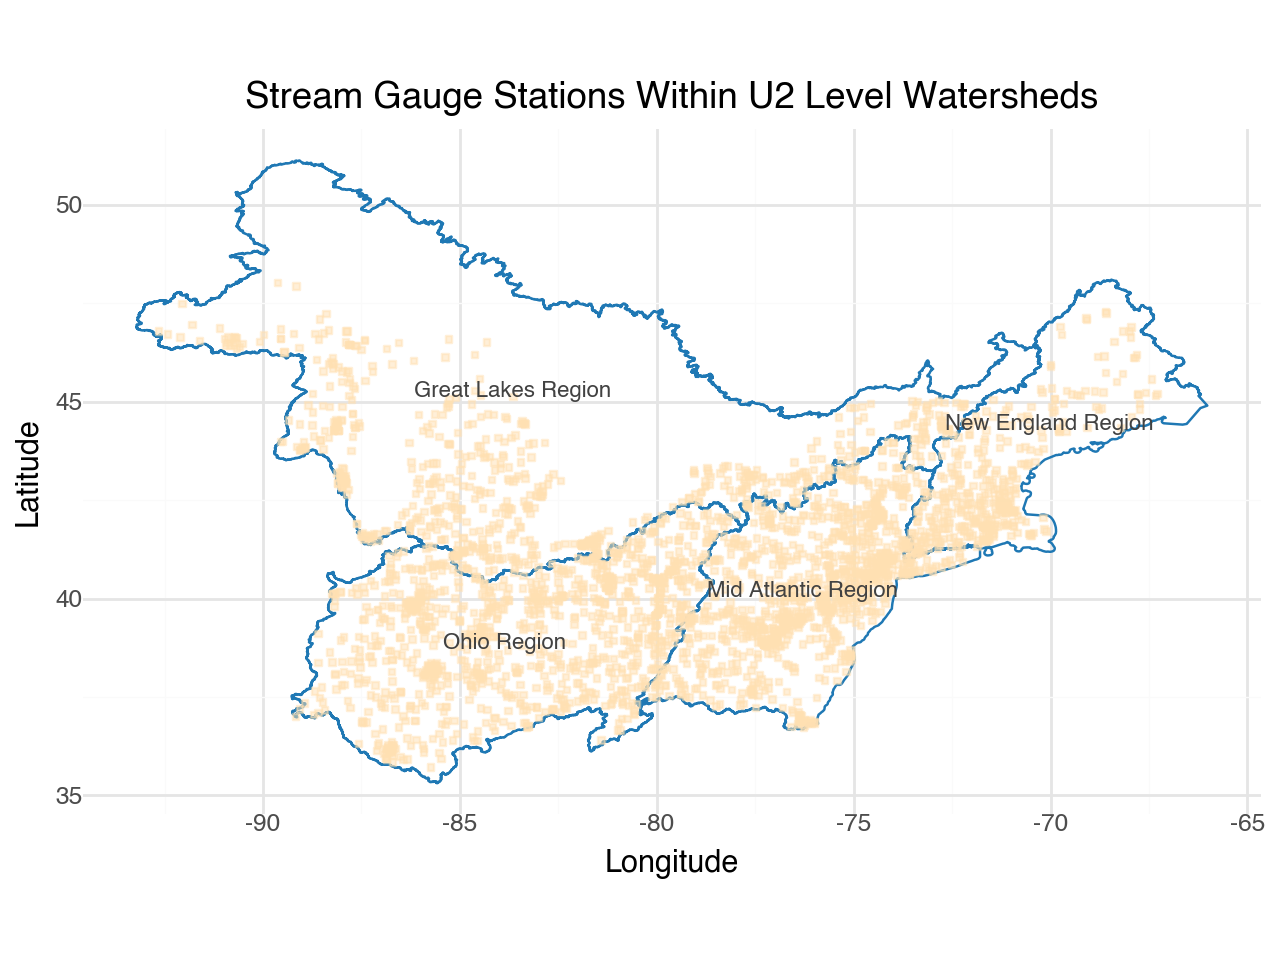

In [ ]:
# Map: Location of Stream Gauging Stations
wsb_style = map_style.get('watershed_boundary')

# Map
stram_gauging_stations_map = (
    ggplot()

    + geom_map(
        mapping=aes(geometry="geometry"),
        data=wb_hu2,
        inherit_aes=False,
        color=wsb_style.get('color'),
        fill=None,
    )

    + geom_map(
        mapping=aes(geometry= "geometry"),
        data = clipped_stream_stations,
        shape = map_style.get('stream_gage').get('shape'),
        fill =  map_style.get('stream_gage').get('fill'),
        color =  map_style.get('stream_gage').get('fill'),
        size =0.8, 
        alpha = 0.5
    )
    + geom_text(
        mapping=aes(x=wb_hu2.centroid.x, y=wb_hu2.centroid.y, label=wb_hu2['name']),
        data=wb_hu2,
        inherit_aes=False,
        size=8,
        color=map_style.get('text').get('color')
    )
    + coord_fixed()
    + theme_minimal()
    + theme(legend_position="none", panel_grid_major=None, panel_grid_minor=None)
    + labs(title="Stream Gauge Stations Within U2 Level Watersheds", x="Longitude", y="Latitude")
)
stram_gauging_stations_map.show()

In [81]:
# Count of stream gauge station within each U2 watershed

# Spatial join: assign each point to the polygon/multipolygon it falls within
joined = gpd.sjoin(clipped_stream_stations, wb_hu2, how="inner", predicate='within')
stream_gauge_per_u2ws = joined.groupby('name').agg({'STAID': 'count'})
print('Number of stream gauging station per watershed:')
stream_gauge_per_u2ws


Number of stream gauging station per watershed:


,STAID
name,
Great Lakes Region,664
Mid Atlantic Region,1091
New England Region,390
Ohio Region,1056


Based on the image and table above, the **Mid Atlantic Region Watershed** contains **1,091 stream gauging stations**, surpassing the other three candidate regions. This number is substantially higher than the initial estimate of 150 to 250 stations. However, since the study area was defined at the U2 watershed level, we will proceed with the original scope.

Next, we will investigate the number of **precipitation stations** and **dams** within the region.


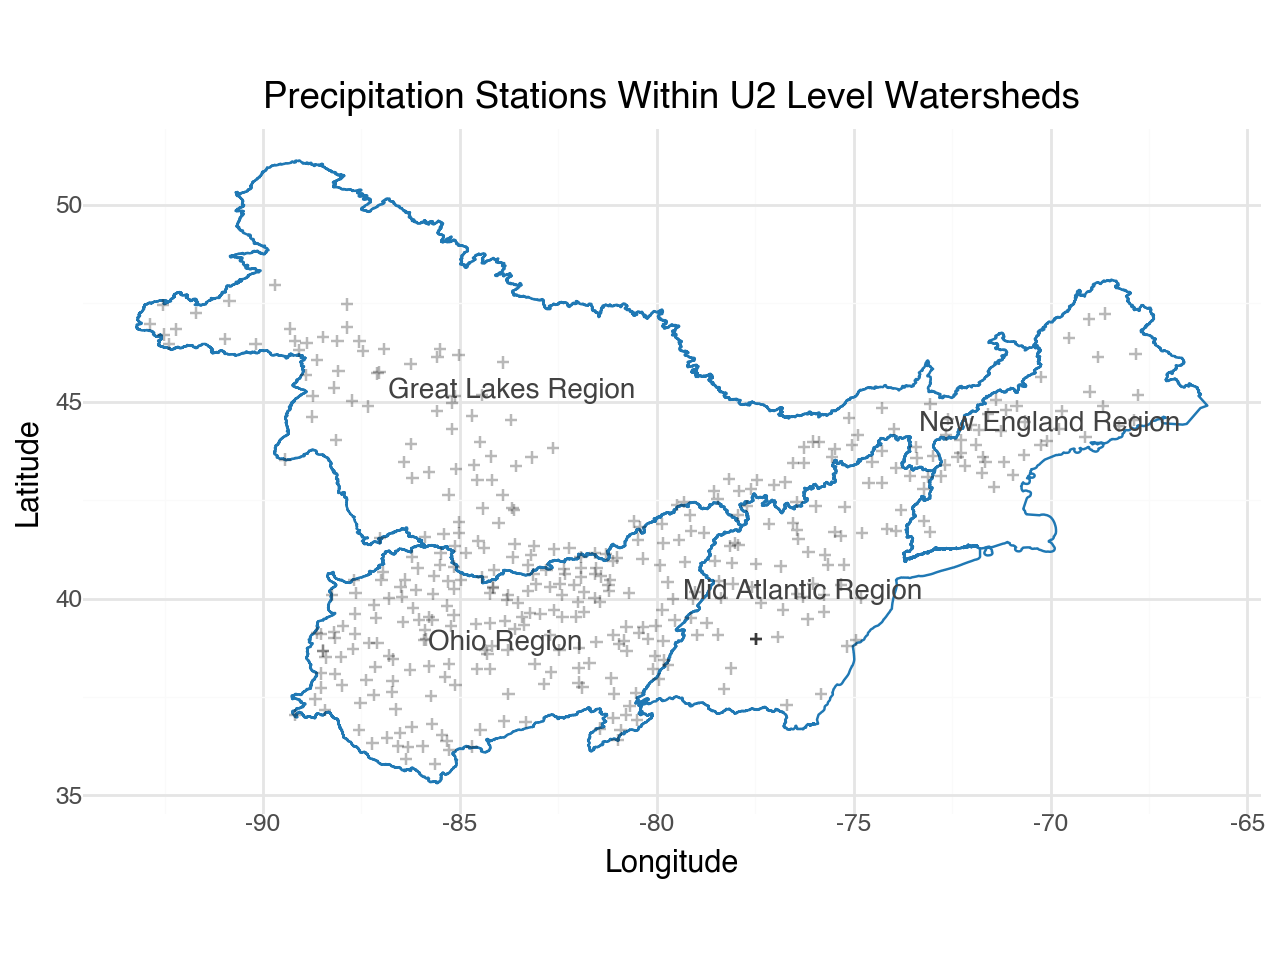

In [126]:
# Map: Location of Precipitation Stations
wsb_style = map_style.get('watershed_boundary')

# Map
ppt_gauging_stations_map = (
    ggplot()

    + geom_map(
        mapping=aes(geometry="geometry"),
        data=wb_hu2,
        inherit_aes=False,
        color=wsb_style.get('color'),
        fill=None,
    )

    + geom_map(
        mapping=aes(geometry= "geometry"),
        data = clipped_ppt_stations,
        shape = map_style.get('precipitation_station').get('shape'),
        fill =  map_style.get('precipitation_station').get('color'),
        size =2, 
        alpha = 0.3
    )
    + geom_text(
        mapping=aes(x=wb_hu2.centroid.x, y=wb_hu2.centroid.y, label=wb_hu2['name']),
        data=wb_hu2,
        inherit_aes=False,
        size=10,
        color=map_style.get('text').get('color')
    )
    + coord_fixed()
    + theme_minimal()
    + theme(legend_position="none", panel_grid_major=None, panel_grid_minor=None)
    + labs(title="Precipitation Stations Within U2 Level Watersheds", x="Longitude", y="Latitude")
)
ppt_gauging_stations_map.show()

In [83]:
# Count of precipitation station within each U2 watershed

# Spatial join: assign each point to the polygon/multipolygon it falls within
joined = gpd.sjoin(clipped_ppt_stations, wb_hu2, how="inner", predicate='within')
ppt_station_per_u2ws = joined.groupby('name').agg({'StnID': 'count'})
print('Number of precipitation station per watershed:')
ppt_station_per_u2ws


Number of precipitation station per watershed:


,StnID
name,
Great Lakes Region,115
Mid Atlantic Region,64
New England Region,40
Ohio Region,189


In [84]:
# Number of stream gauging stations for each precipitation station
stream_gauge_station_for_each_ppt_stn = pd.merge(stream_gauge_per_u2ws, ppt_station_per_u2ws, how = 'left', left_on='name', right_on='name')
stream_gauge_station_for_each_ppt_stn['proportion_stream_ppt_stn'] = round(stream_gauge_station_for_each_ppt_stn['STAID'] /  stream_gauge_station_for_each_ppt_stn['StnID'],1)
print('Number of  stream gauging station for each precipitation gauging stations :')
stream_gauge_station_for_each_ppt_stn

Number of  stream gauging station for each precipitation gauging stations :


,STAID,StnID,proportion_stream_ppt_stn
name,,,
Great Lakes Region,664,115,5.8
Mid Atlantic Region,1091,64,17.0
New England Region,390,40,9.8
Ohio Region,1056,189,5.6


Based on the image and table above, although the Mid Atlantic Region Watershed has greater number of stream gauging station, the **Ohio Region** has a greater distribution of precipitation station. For hydrologic modeling that's important as it better captures the spatial distribution of rainfall within the study region. 

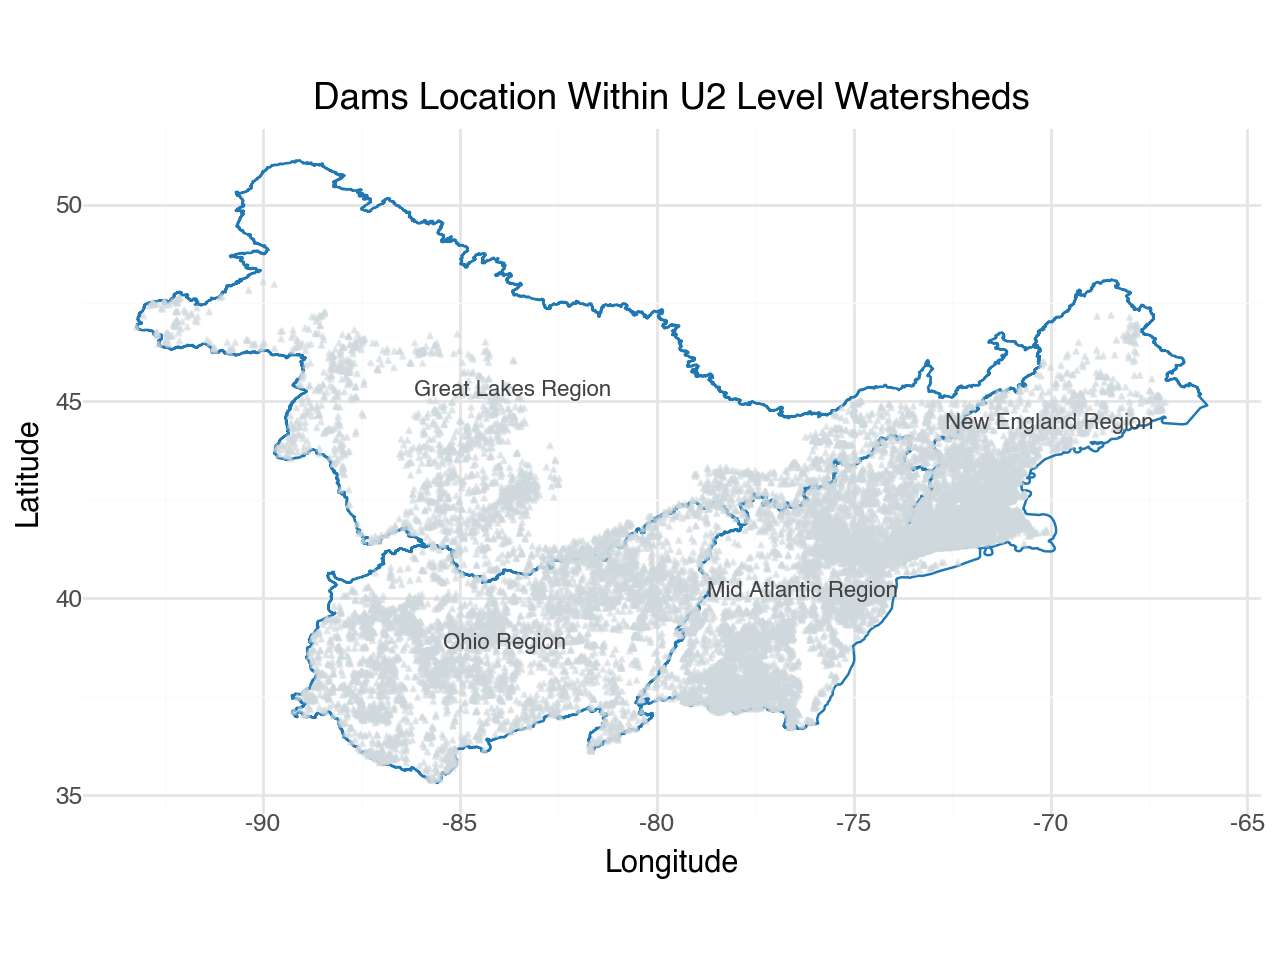

In [101]:
# Map: Location of Precipitation Stations
wsb_style = map_style.get('watershed_boundary')

# Map
dams_map = (
    ggplot()

    + geom_map(
        mapping=aes(geometry="geometry"),
        data=wb_hu2,
        inherit_aes=False,
        color=wsb_style.get('color'),
        fill=None,
    )

    + geom_map(
        mapping=aes(geometry= "geometry"),
        data = clipped_dams,
        shape = map_style.get('dam').get('shape'),
        fill =  map_style.get('dam').get('fill'),
        color =  map_style.get('dam').get('fill'),
        size =.5, 
        alpha = 0.5
    )
    + geom_text(
        mapping=aes(x=wb_hu2.centroid.x, y=wb_hu2.centroid.y, label=wb_hu2['name']),
        data=wb_hu2,
        inherit_aes=False,
        size=8,
        color=map_style.get('text').get('color')
    )
    + coord_fixed()
    + theme_minimal()
    + theme(legend_position="none", panel_grid_major=None, panel_grid_minor=None)
    + labs(title="Dams Location Within U2 Level Watersheds", x="Longitude", y="Latitude")
)
dams_map.show()

In [104]:
# Count of dams within each U2 watershed

# Spatial join: assign each point to the polygon/multipolygon it falls within
joined = gpd.sjoin(clipped_dams, wb_hu2, how="inner", predicate='within')
dams_per_u2ws = joined.groupby('name_right').agg({'nidId': 'count'})
print('Number of dams per watershed:')
dams_per_u2ws

Number of dams per watershed:


,nidId
name_right,
Great Lakes Region,2563
Mid Atlantic Region,5705
New England Region,4294
Ohio Region,4585


## Selected Study Area: Ohio Region

As shown in the table above, the number of dams in the **Mid Atlantic Region** is significantly higher than in the **Ohio Region**, which increases the likelihood that multiple dams fall within watersheds defined by the stream gauging network—potentially regulating those watersheds. One of the premises of this study is to exclude regulated watersheds.

Considering this, along with the higher density of precipitation stations, the **Ohio Region** emerges as the most suitable candidate for the study area. Although **New York State** was initially chosen as the starting point, the Ohio Region—despite only marginally overlapping with New York—was ultimately selected due to its greater potential for yielding higher-quality data.

The study area, has **1056 stream gauging stations** and **189 precipitation station**. 


In [176]:
# Clip study area
study_area = wb_hu2[wb_hu2['name']=='Ohio Region']

target_crs = "EPSG:26918"  # UTM Zone 18N
study_area_50km_buffer = study_area.to_crs(target_crs).buffer(50000)
study_area_50km_buffer = study_area_50km_buffer.to_crs(study_area.crs)

# Clip point data
study_area_stream_gauging_stations = gpd.clip(stream_gauge_stations, mask = study_area)
study_area_ppt_stations = gpd.clip(precipitation_station_geo, mask=study_area_50km_buffer)

study_area_huc2 = wb_hu2[wb_hu2['name']=='Ohio Region'].huc2[0]
study_area_dams = dams_location[dams_location['huc2']==study_area_huc2]

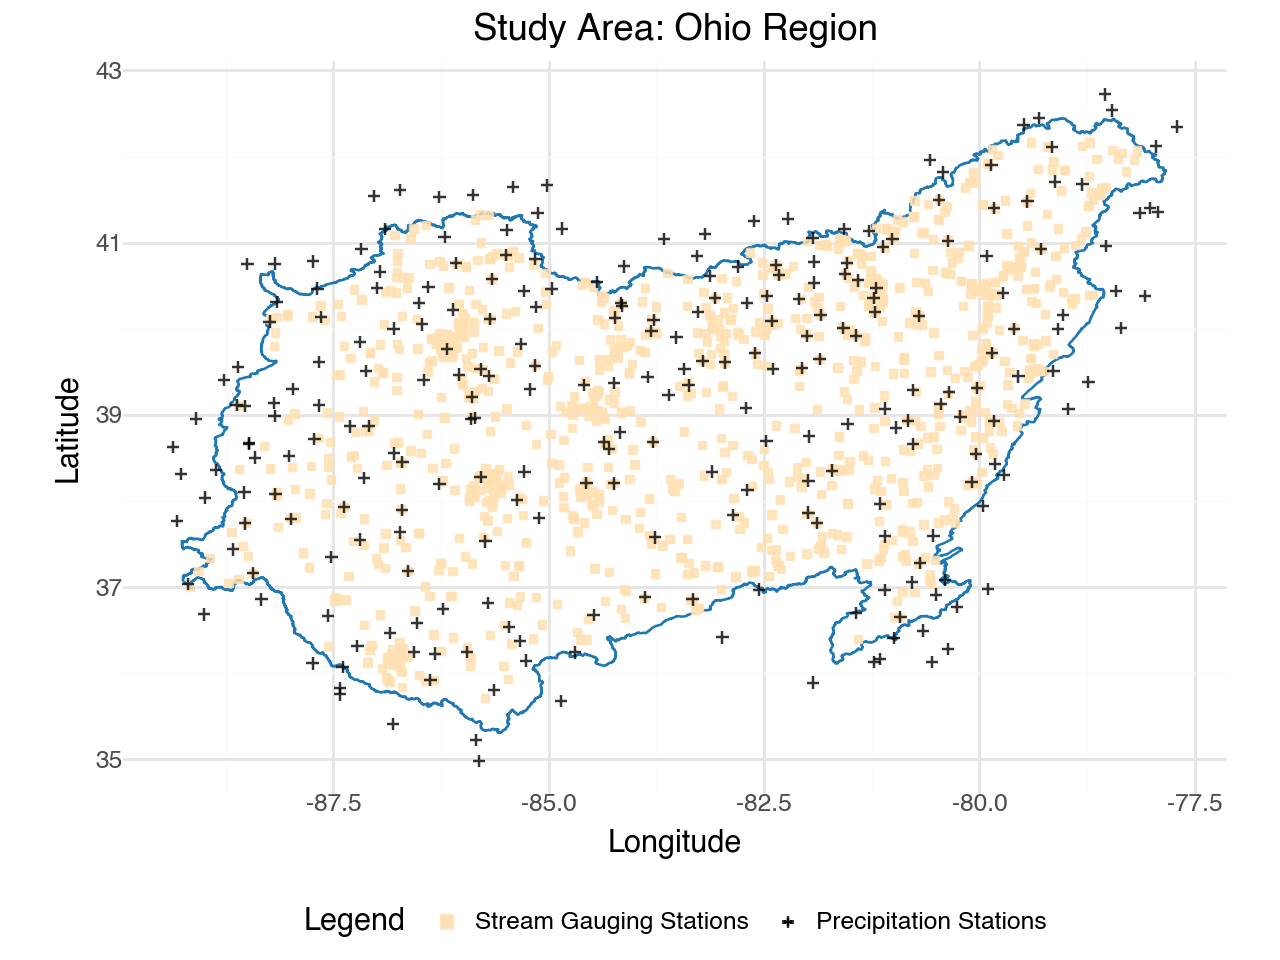

In [ ]:
from plotnine import (
    ggplot, geom_map, geom_point, aes,
    scale_color_manual, scale_shape_manual,
    coord_fixed, theme_minimal, theme, guides,
    guide_legend, labs
)

# 1. Extract lon/lat and add a 'type' column for each station set:
stream = study_area_stream_gauging_stations.copy()
stream['lon']  = stream.geometry.x
stream['lat']  = stream.geometry.y
stream['type'] = "Stream Gauging Stations"

ppt = study_area_ppt_stations.copy()
ppt['lon']  = ppt.geometry.x
ppt['lat']  = ppt.geometry.y
ppt['type'] = "Precipitation Stations"

# 2. Build the map:
study_area_map = (
    ggplot()
    # watershed polygon
    + geom_map(
        aes(geometry="geometry"),
        data=study_area,
        inherit_aes=False,
        color=wsb_style['color'],
        fill=None
    )
    # stream points
    + geom_point(
        aes(x='lon', y='lat', color='type', shape='type'),
        data=stream,
        size=1, alpha=0.8
    )
    # precip points
    + geom_point(
        aes(x='lon', y='lat', color='type', shape='type'),
        data=ppt,
        size=2, alpha=0.8
    )
    # manual scales
    + scale_color_manual(
        name="Legend",
        values={
            "Stream Gauging Stations": map_style['stream_gage']['fill'],
            "Precipitation Stations":  map_style['precipitation_station']['color']
        }
    )
    + scale_shape_manual(
        name="Legend",
        values={
            "Stream Gauging Stations": map_style['stream_gage']['shape'],
            "Precipitation Stations":  map_style['precipitation_station']['shape']
        }
    )
    # ensure the legend uses the actual point glyphs
    + guides(
        color = guide_legend(override_aes={'size': 5}),
        shape = guide_legend(override_aes={'size': 5})
    )
    + coord_fixed()
    + theme_minimal()
    + theme(legend_position="bottom")
    + labs(
        title="Study Area: Ohio Region",
        x="Longitude",
        y="Latitude"
    )
)

study_area_map.show()


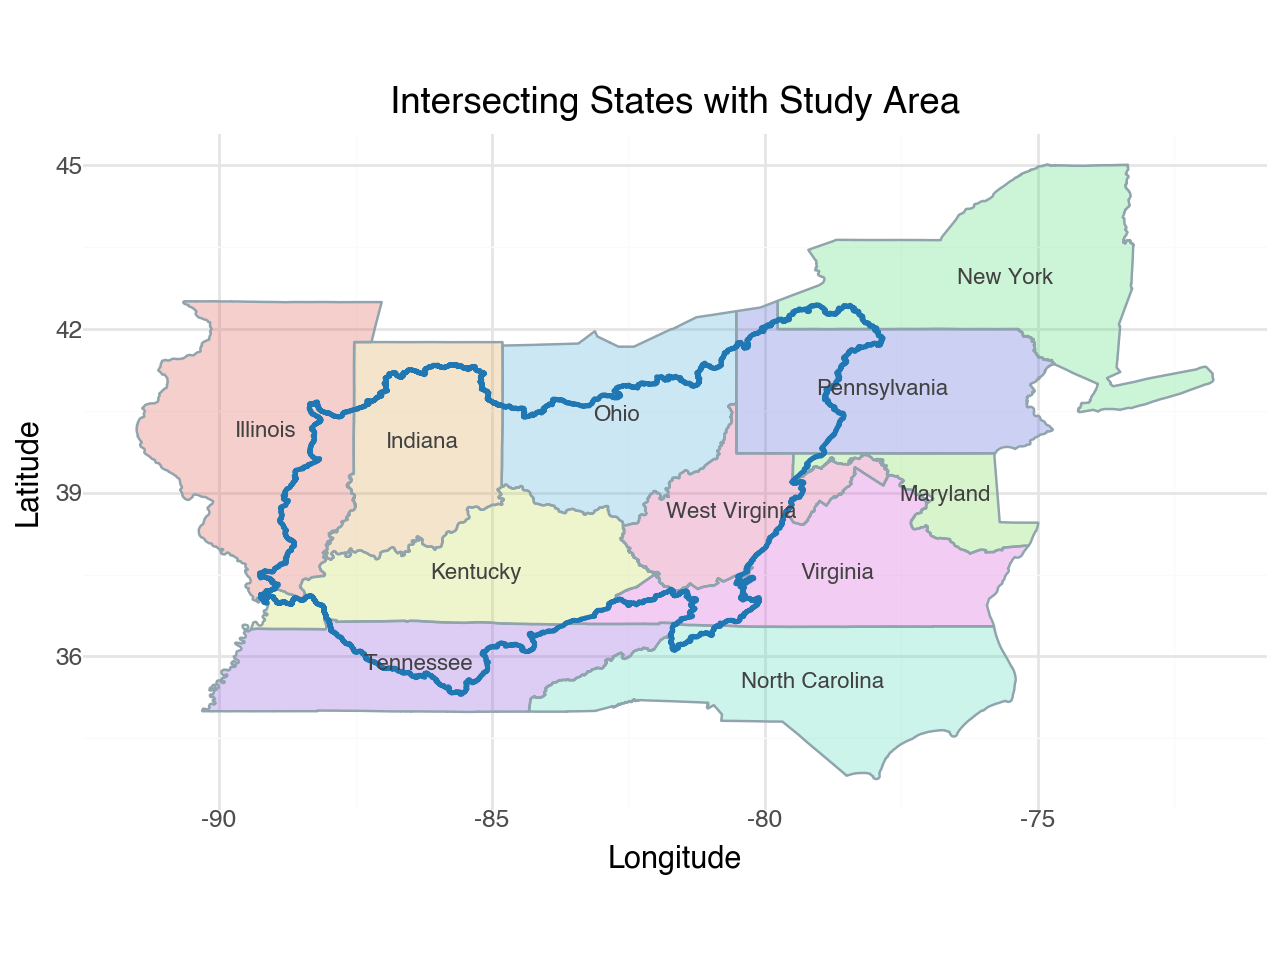

In [167]:
us_states_intersecting = us_state[us_state.geometry.intersects(study_area.unary_union)]

# Map style
wsb_style = map_style.get('watershed_boundary')

# Map
instersecting_states_map = (
    ggplot()
    + geom_map(
        data=us_states_intersecting,
        mapping=aes(fill="NAME", geometry="geometry"),
        inherit_aes=False,
        alpha = 0.3,
        color = map_style.get('us_states').get('color')
    )

    + geom_map(
        mapping=aes(geometry="geometry"),
        data=study_area,
        inherit_aes=False,
        color=wsb_style.get('color'),
        fill=None,
        size =1
    )
    + geom_text(
        mapping=aes(x=us_states_intersecting.centroid.x, y=us_states_intersecting.centroid.y, label=us_states_intersecting['NAME']),
        data=us_states_intersecting,
        inherit_aes=False,
        size=8,
        color=map_style.get('text').get('color')
    )
    
    + coord_fixed()
    + theme_minimal()
    + theme(legend_position="none", panel_grid_major=None, panel_grid_minor=None)
    + labs(title="Intersecting States with Study Area", x="Longitude", y="Latitude")
)
instersecting_states_map.show()

In [173]:
# Boundary box
minx, miny, maxx, maxy = study_area.unary_union.bounds

bottom_left = (minx, miny)
bottom_right = (maxx, miny)
top_right = (maxx, maxy)
top_left = (minx, maxy)

bbox = dict(
    bottom_left=bottom_left,
    bottom_right=bottom_right,
    top_right=top_right,
    top_left=top_left,
    CRS=study_area.crs.to_string(),
    CRS_name = study_area.crs.name
)

# Print as markdown
markdown_output = '  \n'.join([f"**{key}:** {value}" for key, value in bbox.items()])
display(Markdown('#### Boundary Box for the Study Area:\n' + markdown_output))


#### Boundary Box for the Study Area:
**bottom_left:** (-89.26637197396457, 35.313316346228135)  
**bottom_right:** (-77.83937040107656, 35.313316346228135)  
**top_right:** (-77.83937040107656, 42.44983371848417)  
**top_left:** (-89.26637197396457, 42.44983371848417)  
**CRS:** EPSG:4269  
**CRS_name:** NAD83

In [175]:
# Save boundary box locally as JSON file
study_area_bbox_json_path = project_base_path / 'data' / 'silver' /'geo' /'json' / 'study_area_bbox.json'
study_area_bbox_json_path.parent.mkdir(parents=True, exist_ok=True)
try:
    # Export in JSON format
    with open(study_area_bbox_json_path, 'w') as f:
        json.dump(bbox, f, indent=4)
    display(Markdown('##### File with boundary box successfully saved locally as JSON.'))
except Exception as err:
    print(f'Failed to save boundary box as JSON file: {err}')


##### File with boundary box successfully saved locally as JSON.

In [178]:
# Export files
try:
    silver_data_path =  project_base_path / 'data/silver/geo'
    study_area_path = silver_data_path / 'gpkg' / 'study_area.gpkg'
    study_area_path.parent.mkdir(parents=True, exist_ok=True)
    study_area.to_file(study_area_path)

    study_area_50km_buffer_path = silver_data_path / 'gpkg' / 'study_area_50km_buffer.gpkg'
    study_area_50km_buffer_path.parent.mkdir(parents=True, exist_ok=True)
    study_area_50km_buffer.to_file(study_area_50km_buffer_path)

    study_area_stream_gauging_stations_path = silver_data_path / 'gpkg' / 'study_area_stream_gauge_stn.gpkg'
    study_area_stream_gauging_stations_path.parent.mkdir(parents=True, exist_ok=True)
    study_area_stream_gauging_stations.to_file(study_area_stream_gauging_stations_path)

    study_area_ppt_stations_path = silver_data_path / 'gpkg' / 'study_area_ppt_stn.gpkg'
    study_area_ppt_stations_path.parent.mkdir(parents=True, exist_ok=True)
    study_area_ppt_stations.to_file(study_area_ppt_stations_path)


    study_area_dams_path = silver_data_path / 'gpkg' / 'study_area_dams.gpkg'
    study_area_dams_path.parent.mkdir(parents=True, exist_ok=True)
    study_area_dams.to_file(study_area_dams_path)
    print('Succefully saved all study area files locally.')

except Exception as err:
    print(f'Failed to save one or more files: {err}')

Succefully saved all study area files locally.
